In [1]:
import glob
import keras
from keras_applications import mobilenet_v2 
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from utils import imagenet_scraper

/Users/dave/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Notes:
- Model taken from: https://keras.io/applications/#mobilenet
- Useful post: https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/

In [7]:
# Download images of chairs from Imagenet
images_directory = '../downloaded_images/chairs'
imagenet_scraper.main('n03786621', 10, images_directory)


100.0% | [##########] | Progress: 10 / 10 | Time: 3.8s | ETA: --0s

In [18]:
# Load images
images_path = images_directory + '/*.jpg'
images_raw = []
for filename in glob.glob(images_path):
    image_raw = Image.open(filename)
    images_raw.append(image_raw)

In [23]:
# Process iamges
numpy_images = []
for filename in glob.glob(images_path):
    loaded_image = load_img(filename, target_size=(224, 224))
    numpy_images.append(img_to_array(loaded_image))    

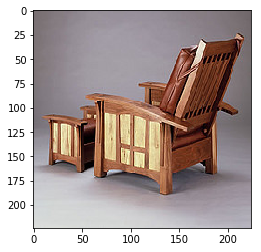

In [28]:
# example of image
plt.imshow(np.uint8(numpy_images[0]))
plt.show()

In [31]:
# Prepare images for model
image_batch = np.expand_dims(numpy_images, axis=0)
processed_images = mobilenet_v2.preprocess_input(image_batch.copy())

In [33]:
# Load model
model = mobilenet_v2.MobileNetV2(weights='imagenet')

In [63]:
# Make and decode predictions
predictions = [model.predict(image) for image in processed_images][0]
predictions_decoded = decode_predictions(preds=predictions, top=5)

[('n04099969', 'rocking_chair', 0.3040574), ('n03125729', 'cradle', 0.27645272), ('n03131574', 'crib', 0.1648781), ('n04429376', 'throne', 0.08353445), ('n03201208', 'dining_table', 0.019040441)]


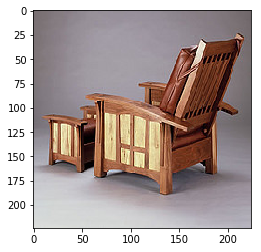

[('n03201208', 'dining_table', 0.2824942), ('n04099969', 'rocking_chair', 0.07711329), ('n03125729', 'cradle', 0.037311677), ('n04380533', 'table_lamp', 0.03135125), ('n03376595', 'folding_chair', 0.029794695)]


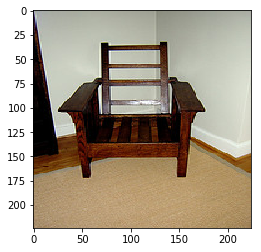

[('n04099969', 'rocking_chair', 0.75796825), ('n03201208', 'dining_table', 0.03879398), ('n03125729', 'cradle', 0.033302102), ('n03179701', 'desk', 0.029456008), ('n03018349', 'china_cabinet', 0.022833815)]


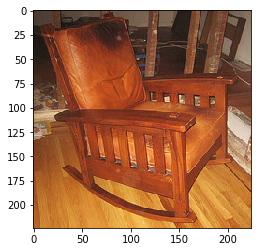

[('n03125729', 'cradle', 0.2478188), ('n04099969', 'rocking_chair', 0.16866614), ('n04344873', 'studio_couch', 0.093852), ('n04429376', 'throne', 0.071973346), ('n03179701', 'desk', 0.052839227)]


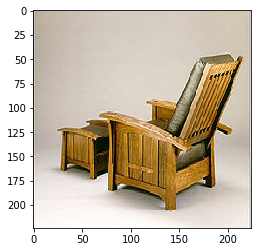

[('n03125729', 'cradle', 0.6006508), ('n04099969', 'rocking_chair', 0.22758335), ('n02804414', 'bassinet', 0.014079672), ('n03131574', 'crib', 0.013024799), ('n04371774', 'swing', 0.011727932)]


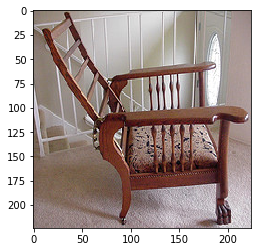

[('n04099969', 'rocking_chair', 0.7806706), ('n04429376', 'throne', 0.20125216), ('n03376595', 'folding_chair', 0.0013206162), ('n04525038', 'velvet', 0.00093144126), ('n03903868', 'pedestal', 0.0008738273)]


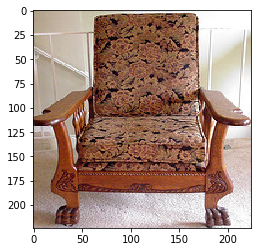

[('n04099969', 'rocking_chair', 0.69062907), ('n03376595', 'folding_chair', 0.08694711), ('n03125729', 'cradle', 0.07560013), ('n03201208', 'dining_table', 0.025174545), ('n02804414', 'bassinet', 0.017092695)]


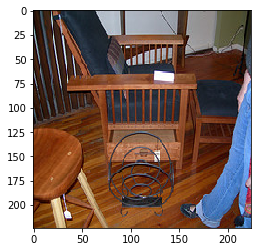

[('n03125729', 'cradle', 0.8437635), ('n04099969', 'rocking_chair', 0.024769615), ('n03447721', 'gong', 0.008470691), ('n03697007', 'lumbermill', 0.00839718), ('n03495258', 'harp', 0.008247979)]


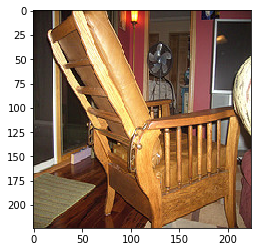

[('n04099969', 'rocking_chair', 0.68092364), ('n04429376', 'throne', 0.14564662), ('n04344873', 'studio_couch', 0.027588837), ('n03388549', 'four-poster', 0.0085464595), ('n03376595', 'folding_chair', 0.0074417894)]


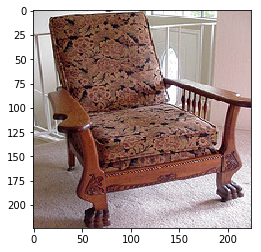

IndexError: list index out of range

In [67]:
# Results
for i in range(10):
    print(predictions_decoded[i])
    plt.imshow(np.uint8(numpy_images[i]))
    plt.show()

## Summary

There's some work to be done with this model. Later, I'll explore the results with other types of images, but I think we'll have to [fine-tune](https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/) this model to our desired state. Currently, it tries to predict 1 of 1000 classifications for an image. I don't think we need this make - at least not yet. I expect it will be able to achieve better results with fewer classifications. 